In [1]:
import numpy as np
import pandas as pd
import json
import ast

In [2]:
reference=pd.read_csv('csv/Reference.csv')

In [3]:
reference.describe()

,@id,subject_is,predicate_is,object_is,reference_is
count,352,352,352,352,352
unique,352,47,8,250,292
top,R5000212,R5000025,P54,R5000036,['R5000997']
freq,1,190,196,17,6


In [4]:
reference['reference_is']=reference['reference_is'].apply(lambda x:ast.literal_eval(x))

In [5]:
reference['num']=reference['reference_is'].apply(lambda x:len(x))

In [6]:
reference

,@id,subject_is,predicate_is,object_is,reference_is,num
0,R5000095,R5000010,P18,R5000045,"[R5000447, R5000448, R5000449, R5000450, R5000...",45
1,R5000096,R5000010,P53,R5000025,"[R5000492, R5000493, R5000494, R5000495, R5000...",29
2,R5000097,R5000025,P53,R5000023,"[R5000521, R5000522, R5000523, R5000524, R5000...",12
3,R5000098,R5000025,P53,R5000033,"[R5000532, R5000533, R5000534, R5000535, R5000...",16
4,R5000099,R5000025,P55,R5000053,"[R5000548, R5000549, R5000550, R5000551, R5000...",63
...,...,...,...,...,...,...
347,R5000442,R5000025,P54,Huanan South China Seafood Market,[R5001201],1
348,R5000443,R5000025,P54,96% 34 identical at the whole genome level to ...,[R5001202],1
349,R5000444,R5000002,P18,R5000045,[R5001203],1
350,R5000445,R5000016,P18,R5000035,[R5000787],1


In [7]:
items=pd.read_csv('csv/type.csv')
items=items[['@id','label']]
items=items.set_index('@id')['label']

In [8]:
label=items.to_dict()
label.keys()

dict_keys(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'R5000001', 'R5000002', 'R5000003', 'R5000004', 'R5000005', 'R5000006', 'R5000007', 'R5000008', 'R5000009', 'R5000010', 'R5000011', 'R5000012', 'R5000013', 'R5000014', 'R5000015', 'R5000016', 'R5000017', 'R5000018', 'R5000019', 'R5000020', 'R5000021', 'R5000022', 'R5000023', 'R5000024', 'R5000025', 'R5000026', 'R5000027', 'R5000028', 'R5000029', 'R5000030', 'R5000031', 'R5000032', 'R5000033', 'R

In [9]:
prop=pd.read_csv('csv/property.csv')
prop=prop[['@id','label']].set_index('@id')['label']
prop

@id
P1          species
P2            genus
P3         subGenus
P4           family
P5        subFamily
           ...     
P58      subject_is
P59       object_is
P60    predicate_is
P61    reference_is
P62           title
Name: label, Length: 62, dtype: object

In [10]:
props=prop.to_dict()
props.keys()

dict_keys(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62'])

In [11]:
def getvalue(x,dictionary):
    if(x in dictionary):
        return dictionary[x]
    else:
        return x

In [12]:
reference.subject_is=reference.subject_is.apply(lambda x:getvalue(x,label))

In [13]:
reference.predicate_is=reference.predicate_is.apply(lambda x:getvalue(x,props))

In [14]:
reference.object_is=reference.object_is.apply(lambda x:getvalue(x,label))

In [15]:
reference

,@id,subject_is,predicate_is,object_is,reference_is,num
0,R5000095,SARS-CoV,produce,Spike,"[R5000447, R5000448, R5000449, R5000450, R5000...",45
1,R5000096,SARS-CoV,similarity,SARS-CoV-2,"[R5000492, R5000493, R5000494, R5000495, R5000...",29
2,R5000097,SARS-CoV-2,similarity,Beta coronavirus,"[R5000521, R5000522, R5000523, R5000524, R5000...",12
3,R5000098,SARS-CoV-2,similarity,MERS-CoV,"[R5000532, R5000533, R5000534, R5000535, R5000...",16
4,R5000099,SARS-CoV-2,virus_protein_interaction,ACE2,"[R5000548, R5000549, R5000550, R5000551, R5000...",63
...,...,...,...,...,...,...
347,R5000442,SARS-CoV-2,property_is,Huanan South China Seafood Market,[R5001201],1
348,R5000443,SARS-CoV-2,property_is,96% 34 identical at the whole genome level to ...,[R5001202],1
349,R5000444,porcine epidemic diarrhea virus,produce,Spike,[R5001203],1
350,R5000445,Bat-SL-CoVZC45,produce,E,[R5000787],1


In [16]:
def count(x):
    x = np.array(x)
    x= np.unique(x)
    return len(x)

In [97]:
reference_virus=reference.groupby('subject_is')['reference_is'].sum().apply(lambda x:count(x)).to_frame()
minor_virus=reference_virus['reference_is']<8
others=reference_virus[minor_virus].sum()
reference_virus.drop(reference_virus[minor_virus].index, inplace=True)
reference_virus.loc['others']=int(others.values)
reference_virus['num_refer']=reference_virus['reference_is']
del reference_virus['reference_is']
reference_virus.sort_values(by='num_refer',ascending=False)

,num_refer
subject_is,
SARS-CoV-2,470
SARS-CoV,162
others,74
Coronaviruses,49
Spike,49
MERS-CoV,27
nelfinavir,12
bat SARS-CoV-like,8
Bat coronavirus,8


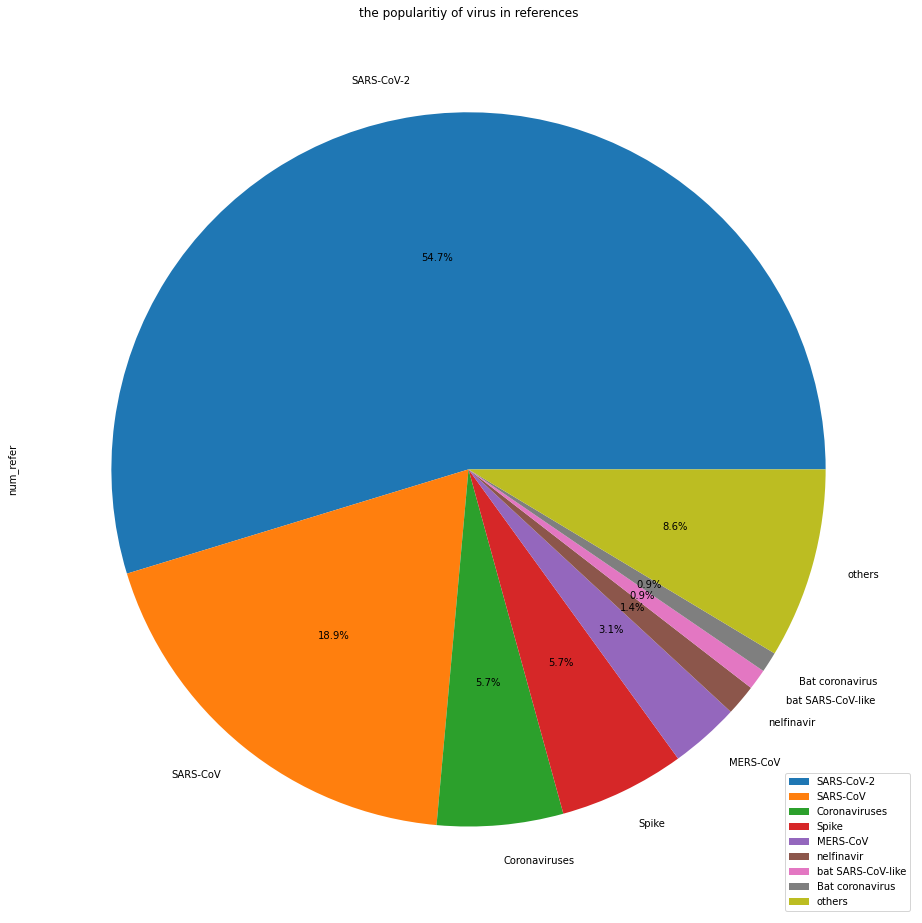

In [99]:
plot = reference_virus.plot.pie(y='num_refer',figsize=(16, 20),title='the popularitiy of virus in references',autopct='%1.1f%%')
fig = plot.get_figure()
fig.savefig("img/virus.svg")

In [108]:
reference_obj=reference.groupby('object_is')['reference_is'].sum().apply(lambda x:count(x)).to_frame()
minor_obj=reference_obj['reference_is']<8
others=reference_obj[minor_obj].sum()
reference_obj.drop(reference_obj[minor_obj].index, inplace=True)
reference_obj.loc['others']=int(others.values)
reference_obj['num_refer']=reference_obj['reference_is']
del reference_obj['reference_is']
reference_obj.sort_values(by='num_refer',ascending=False)
reference_obj

,num_refer
object_is,
ACE2,132
Bat SARS-like Coronaviruses,9
Bat coronavirus,14
Bat-SL-CoVZC45,10
Beta coronavirus,13
E,15
MERS-CoV,25
Mpro,88
N,18


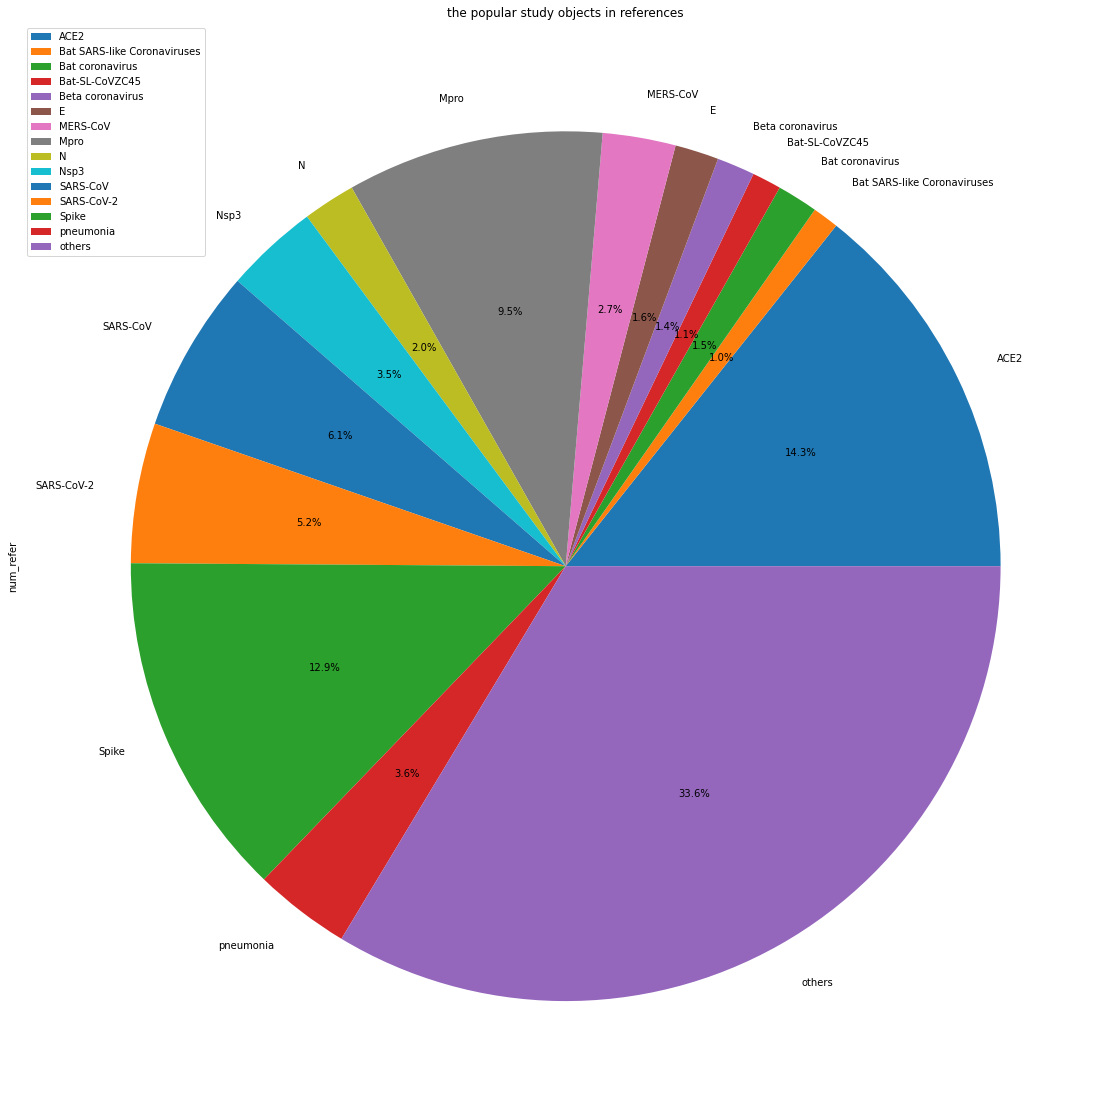

In [120]:
plot = reference_obj.plot.pie(y='num_refer',figsize=(20, 20),title='the popular study objects in references',autopct='%1.1f%%')
fig = plot.get_figure()
fig.savefig("img/object.svg")